# Aula 5 - Hipóteses mais complexas e regularização

Na aula de hoje, vamos explorar os seguintes tópicos em Python:

- 1) Hipóteses mais complexas
- 2) Regularização

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

_____


## 1) Hipóteses mais complexas

Muitas vezes, temos dados que simplesmente não se ajustam às hipóteses simples, lineares, que conhecemos até o momento.

Quando isso acontece, é muito provável que soframos **underfitting**, pois uma forma funcional demasiadamente simples de uma hipótese pode não ser capaz de capturar o comportamento de uma função teórica $\mathcal{F}$ mais complexa, conforme refletido pela amostra.

Nestes casos, a solução é simples: basta escolhermos hipóteses mais complexas!

Pra começar nosso estudo, vamos utilizar dados bem simples do próprio sklearn (submódulo [datasets](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets)):


In [112]:
from sklearn.datasets import make_regression

In [113]:
X, y = make_regression(n_samples=700, n_features=1, noise=35, tail_strength=50, random_state=42)

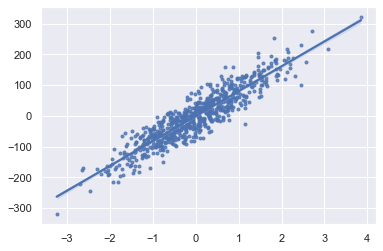

In [114]:
sns.regplot(x=X, y=y, marker='.');

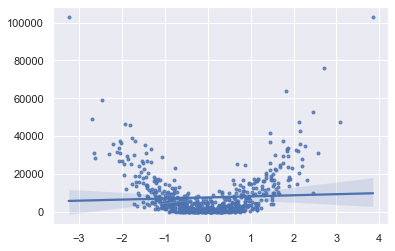

In [115]:
X, y = make_regression(n_samples=700, n_features=1, noise=35, tail_strength=50, random_state=42)
# transform to square
y = y**2

sns.regplot(x=X, y=y, marker='.');

Fazendo a Regressão Linear

In [116]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [117]:
from sklearn.linear_model import LinearRegression

reg_lin = LinearRegression()

reg_lin.fit(X_train, y_train)

LinearRegression()

In [118]:
print(f'Intercept (b0): {reg_lin.intercept_}')
print(f'Parameters (b1,...,bn): {reg_lin.coef_}')

Intercept (b0): 7279.765399809274
Parameters (b1,...,bn): [1303.44379459]


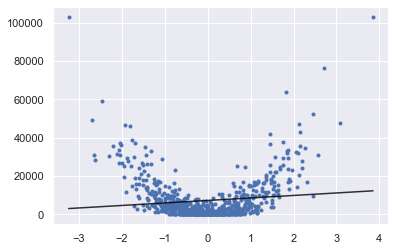

In [119]:
x_axis = np.linspace(X.min(), X.max(), 1000)

y_axis = reg_lin.intercept_ + reg_lin.coef_[0]*x_axis

plt.plot(x_axis, y_axis, color='black', alpha=0.8)
plt.scatter(X,y, marker='.')
plt.show()

In [120]:
# metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [121]:
# trainning prediction
y_pred_train = reg_lin.predict(X_train)

print(f'R^2 score:{r2_score(y_train, y_pred_train):.2f}')
print(f'MSE:{mean_absolute_error(y_train, y_pred_train):.2f}')
print(f'RMSE:{np.sqrt(mean_squared_error(y_train, y_pred_train)):.2f}')

R^2 score:0.01
MSE:7181.56
RMSE:10802.78


In [122]:
# test prediction
y_pred = reg_lin.predict(X_test)

print(f'R^2 score:{r2_score(y_test, y_pred):.2f}')
print(f'MSE:{mean_absolute_error(y_test, y_pred):.2f}')
print(f'RMSE:{np.sqrt(mean_squared_error(y_test, y_pred)):.2f}')

R^2 score:-0.05
MSE:8121.31
RMSE:13395.52


Naturalmente, temos métricas bem ruins, dada a escolha ruim de hipótese!

Vamos fazer algo melhor: como nossos dados são aproximadamente quadráticos, faria sentido escolher uma **hipótese quadrática**, não é mesmo? Isto é,

$$f_{h, \  \vec{b}}(x) = b_0 + b_1x + b_2x^2$$

E é aqui que entra um dos aspectos mais importantes de um modelo linear como a regressão linear: **o modelo é linear nos parâmetros, não necessariamente nas features!**

Ou seja, o termo quadrado que incluímos **pode ser considerado como uma nova feature linear**. Para ver isso, basta definir $z \equiv x^2$, que voltamos a ter uma hipótese linear, mas agora em duas variáveis:

$$f_{h, \  \vec{b}}(x, z) = b_0 + b_1x + b_2z$$

Ou seja, ainda temos uma regressão linear (múltipla, agora).

E isso é verdade para **qualquer** combinação de features que possamos criar!

________

Um outro exemplo: considere uma hipótese linear para um modelo com duas features $x_1, x_2$:

$$f_{h, \  \vec{b}}(x_1, x_2) = b_0 + b_1x_1 + b_2x_2$$

Caso queiramos produzir um modelo quadrático, temos que incluir os termos $x_1^2, x_2^2$ e também $x_1x_2$ (que também é quadrático), de modo que nossa hipótese fica sendo:

$$f_{h, \  \vec{b}}(x_1, x_2) = b_0 + b_1x_1 + b_2x_2 + b_3 x_1^2 + b_4 x_2^2 + b_5 x_1 x_2$$

O que não deixa de ser uma **regressão linear múltipla** de 5 variáveis ($x_3 \equiv x_1^2$, $x_4 \equiv x_2^2$ e $x_5 \equiv x_1x_2$):

$$f_{h, \  \vec{b}}(x_1, x_2, x_3, x_4, x_5) = b_0 + b_1x_1 + b_2x_2 + b_3 x_3 + b_4 x_4 + b_5 x_5$$

E assim por diante! ;)

Assim, para criarmos um modelo quadrático para nossos dados, bastaria criarmos uma nova feature $z = x^2$, e passar apenas esta nova feature para o  modelo de regressão linear **simples**. Isso equivale a usar uma hipótese $$f_{h, \  \vec{b}}(z) = b_0 + b_1z = b_0 + b_1x^2$$

Vejamos:

In [123]:
# feature Z = X^2
Z = X**2

Intercept (b0): 934.45646845801
Parameters (b1,...,bn): [6661.31189456]


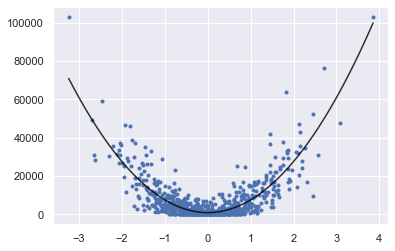

R^2 score:0.73
MSE:3581.64
RMSE:5636.74
R^2 score:0.73
MSE:4326.26
RMSE:6778.47


In [124]:
# split train-test
X_train, X_test, y_train, y_test = train_test_split(Z, y, test_size=0.2, random_state=42)

# create and fit model
reg_lin = LinearRegression()
reg_lin.fit(X_train, y_train)

# summary
print(f'Intercept (b0): {reg_lin.intercept_}')
print(f'Parameters (b1,...,bn): {reg_lin.coef_}')

# plot data
x_axis = np.linspace(X.min(), X.max(), 1000)
y_axis = reg_lin.intercept_ + reg_lin.coef_[0]*(x_axis**2)
plt.plot(x_axis, y_axis, color='black', alpha=0.8)
plt.scatter(X,y, marker='.')
plt.show()

# trainning prediction
y_pred_train = reg_lin.predict(X_train)

print(f'R^2 score:{r2_score(y_train, y_pred_train):.2f}')
print(f'MSE:{mean_absolute_error(y_train, y_pred_train):.2f}')
print(f'RMSE:{np.sqrt(mean_squared_error(y_train, y_pred_train)):.2f}')

# test prediction
y_pred = reg_lin.predict(X_test)

print(f'R^2 score:{r2_score(y_test, y_pred):.2f}')
print(f'MSE:{mean_absolute_error(y_test, y_pred):.2f}')
print(f'RMSE:{np.sqrt(mean_squared_error(y_test, y_pred)):.2f}')


Agora sim, um modelo beeem melhor!!

E se quisermos usar a hipótese quadrática mais completa, com ambos os termos linear e quadrático? (Isto é, $f_{h, \  \vec{b}}(x) = b_0 + b_1x + b_2x^2$)

Bem simples: basta passarmos as duas features pro sklearn:

In [125]:
X_df = pd.DataFrame(X, columns=['X'])
X_df.head()

,X
0,-1.197878
1,-1.024388
2,-0.269407
3,0.384065
4,-0.107030


In [126]:
X_df['Z'] = X_df['X']**2
X_df.head()

,X,Z
0,-1.197878,1.434911
1,-1.024388,1.049370
2,-0.269407,0.072580
3,0.384065,0.147506
4,-0.107030,0.011455


Intercept (b0): 927.9689134531263
Parameters (b1,...,bn): [ -65.6131123  6667.88666831]


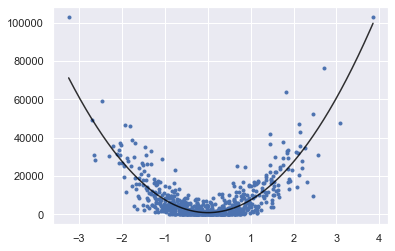

R^2 score:0.73
MSE:3581.93
RMSE:5636.39
R^2 score:0.73
MSE:4331.75
RMSE:6772.88


In [127]:
# split train-test
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.2, random_state=42)

# create and fit model
reg_lin = LinearRegression()
reg_lin.fit(X_train, y_train)

# summary
print(f'Intercept (b0): {reg_lin.intercept_}')
print(f'Parameters (b1,...,bn): {reg_lin.coef_}')

# plot data
x_axis = np.linspace(X.min(), X.max(), 1000)
y_axis = reg_lin.intercept_ + reg_lin.coef_[0]*(x_axis) + reg_lin.coef_[1]*(x_axis**2)
plt.plot(x_axis, y_axis, color='black', alpha=0.8)
plt.scatter(X,y, marker='.')
plt.show()

# trainning prediction
y_pred_train = reg_lin.predict(X_train)

print(f'R^2 score:{r2_score(y_train, y_pred_train):.2f}')
print(f'MSE:{mean_absolute_error(y_train, y_pred_train):.2f}')
print(f'RMSE:{np.sqrt(mean_squared_error(y_train, y_pred_train)):.2f}')

# test prediction
y_pred = reg_lin.predict(X_test)

print(f'R^2 score:{r2_score(y_test, y_pred):.2f}')
print(f'MSE:{mean_absolute_error(y_test, y_pred):.2f}')
print(f'RMSE:{np.sqrt(mean_squared_error(y_test, y_pred)):.2f}')

No geral, dá pra ir aumentando a ordem dos polinomios criando features de ordem maior uma a uma:

O procedimento acima é bem manual. Pra nossa sorte, o sklearn existe, e uma de suas muitas ferramentas especiais para machine learning (no caso, pré-processamento) é o [polynomial features](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html), que permite a criação de toda as combinações polinomiais de features automaticamente!

O PolynomialFeatures é nosso primeiro exemplo de **transformer** do sklearn - um método cujo objetivo é aplicar alguma **transformação** aos dados. Veremos vários outros exemplos de transformers durante o curso.

Em particular, todos os transformers se comportam como se fossem "estimadores", no sentido de que eles devem ser "ajustados" aos dados -- por isso, eles também têm o método `.fit()` -- que ajusta o transformer aos dados; além do método `.transform()`, que efetivamente transforma os dados. Existe também o `.fit_transform()`, que faz as duas coisas ao mesmo tempo -- mas vamos evitar de usá-lo, por motivos que ficarão claros no futuro próximo.

Lembre-se de fitar o transformados sempre nos dados de treino, apenas! Neste caso, não faz muita diferença, mas, para nos acostumarmos a isso, vamos fazer aqui também!

In [128]:
# split train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [129]:
from sklearn.preprocessing import PolynomialFeatures

# instanciando com os parâmetros
poly = PolynomialFeatures(degree=2, include_bias=False)
# fit apenas em dados de treino!
poly.fit(X_train)
# transformar com todos os dados
X_train_transf = poly.transform(X_train)
X_test_transf = poly.transform(X_test)

______

Tudo numa unica célula:

Original features: 1
Current features in the transformed space: 2
Intercept (b0): 927.9689134531272
Parameters (b1,...,bn): [ -65.6131123  6667.88666831]


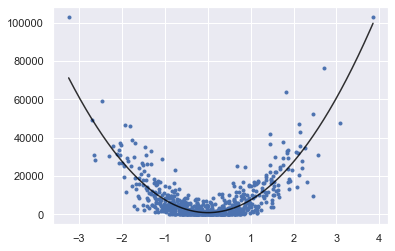

R^2 score:0.73
MSE:3581.93
RMSE:5636.39
R^2 score:0.73
MSE:4331.75
RMSE:6772.88


In [130]:
# split train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# instanciando com os parâmetros
poly = PolynomialFeatures(degree=2, include_bias=False)
# fit apenas em dados de treino!
poly.fit(X_train)

print(f'Original features: {poly.n_features_in_}')
print(f'Current features in the transformed space: {poly.n_output_features_}')

# transformar com todos os dados
X_train = poly.transform(X_train)
X_test = poly.transform(X_test)

# create and fit model
reg_lin = LinearRegression()
reg_lin.fit(X_train, y_train)

# summary
print(f'Intercept (b0): {reg_lin.intercept_}')
print(f'Parameters (b1,...,bn): {reg_lin.coef_}')

# plot data
x_axis = np.linspace(X.min(), X.max(), 1000)
y_axis = reg_lin.intercept_ + sum([b_n*(x_axis**(n+1)) for n, b_n in enumerate(reg_lin.coef_)])

#y_axis = reg_lin.intercept_
#for n, b_n in enumerate(reg_lin.coef_):
#    y_axis += b_n*(x_axis**(n+1))
plt.plot(x_axis, y_axis, color='black', alpha=0.8)
plt.scatter(X,y, marker='.')
plt.show()

# trainning prediction
y_pred_train = reg_lin.predict(X_train)

print(f'R^2 score:{r2_score(y_train, y_pred_train):.2f}')
print(f'MSE:{mean_absolute_error(y_train, y_pred_train):.2f}')
print(f'RMSE:{np.sqrt(mean_squared_error(y_train, y_pred_train)):.2f}')

# test prediction
y_pred = reg_lin.predict(X_test)

print(f'R^2 score:{r2_score(y_test, y_pred):.2f}')
print(f'MSE:{mean_absolute_error(y_test, y_pred):.2f}')
print(f'RMSE:{np.sqrt(mean_squared_error(y_test, y_pred)):.2f}')

In [131]:
def create_model(X, y, dg=1, plot=True):
    # split train-test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # instanciando com os parâmetros
    poly = PolynomialFeatures(degree=dg, include_bias=False)
    # fit apenas em dados de treino!
    poly.fit(X_train)

    print(f'Original features: {poly.n_features_in_}')
    print(f'Current features in the transformed space: {poly.n_output_features_}')

    # transformar com todos os dados
    X_train = poly.transform(X_train)
    X_test = poly.transform(X_test)

    # create and fit model
    reg_lin = LinearRegression()
    reg_lin.fit(X_train, y_train)

    #print(f'Intercept (b0): {reg_lin.intercept_}')
    #print(f'Parameters (b1,...,bn): {reg_lin.coef_}')

    # plot data
    if plot:
        x_axis = np.linspace(X.min(), X.max(), 1000)
        y_axis = reg_lin.intercept_ + sum([b_n*(x_axis**(n+1)) for n, b_n in enumerate(reg_lin.coef_)])

        #y_axis = reg_lin.intercept_
        #for n, b_n in enumerate(reg_lin.coef_):
        #    y_axis += b_n*(x_axis**(n+1))
        plt.plot(x_axis, y_axis, color='black', alpha=0.8)
        plt.scatter(X,y, marker='.')
        plt.show()

    # trainning prediction
    y_pred_train = reg_lin.predict(X_train)

    print(f'R^2 score:{r2_score(y_train, y_pred_train):.2f}')
    print(f'MSE:{mean_absolute_error(y_train, y_pred_train):.2f}')
    print(f'RMSE:{np.sqrt(mean_squared_error(y_train, y_pred_train)):.2f}')

    # test prediction
    y_pred = reg_lin.predict(X_test)

    print(f'R^2 score:{r2_score(y_test, y_pred):.2f}')
    print(f'MSE:{mean_absolute_error(y_test, y_pred):.2f}')
    print(f'RMSE:{np.sqrt(mean_squared_error(y_test, y_pred)):.2f}')

    return pd.DataFrame({
    'Features' : poly.n_output_features_,
    'MAE_train' : mean_absolute_error(y_train, y_pred_train),
    'MAE_test' : mean_absolute_error(y_test, y_pred)
}, index=['features'])

Em aulas anteriores, discutimos sobre a **maldição da dimensionalidade**, e como é fácil overfitar um modelo ao aumentarmos a dimensionalidade. Vamos ver isso claramente?

In [132]:
results_df = pd.DataFrame({
    'Features':[],
    'MAE_train':[],
    'MAE_test':[]
})

Original features: 1
Current features in the transformed space: 1


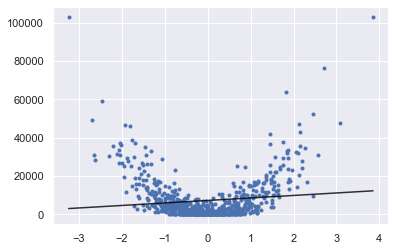

R^2 score:0.01
MSE:7181.56
RMSE:10802.78
R^2 score:-0.05
MSE:8121.31
RMSE:13395.52
Original features: 1
Current features in the transformed space: 2


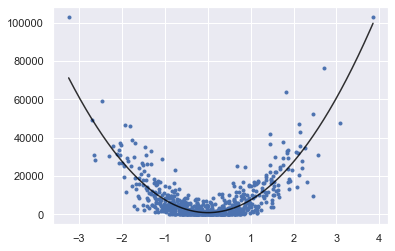

R^2 score:0.73
MSE:3581.93
RMSE:5636.39
R^2 score:0.73
MSE:4331.75
RMSE:6772.88
Original features: 1
Current features in the transformed space: 3


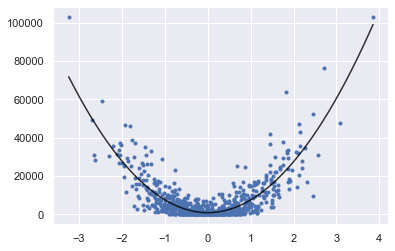

R^2 score:0.73
MSE:3581.40
RMSE:5636.21
R^2 score:0.73
MSE:4325.38
RMSE:6752.01
Original features: 1
Current features in the transformed space: 4


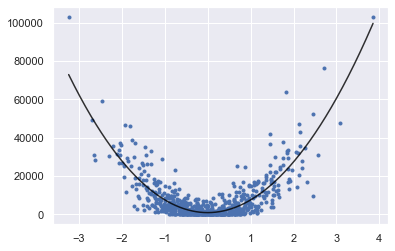

R^2 score:0.73
MSE:3581.20
RMSE:5636.02
R^2 score:0.73
MSE:4321.62
RMSE:6722.47
Original features: 1
Current features in the transformed space: 5


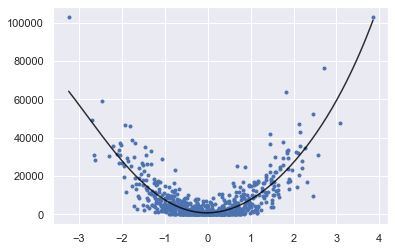

R^2 score:0.73
MSE:3579.89
RMSE:5632.09
R^2 score:0.72
MSE:4340.23
RMSE:6961.70
Original features: 1
Current features in the transformed space: 6


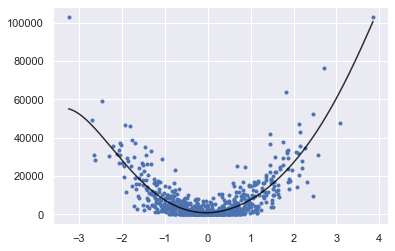

R^2 score:0.73
MSE:3581.46
RMSE:5630.48
R^2 score:0.68
MSE:4408.62
RMSE:7348.44
Original features: 1
Current features in the transformed space: 7


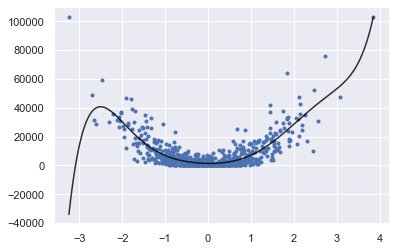

R^2 score:0.74
MSE:3544.41
RMSE:5577.53
R^2 score:-0.01
MSE:5078.57
RMSE:13082.57
Original features: 1
Current features in the transformed space: 8


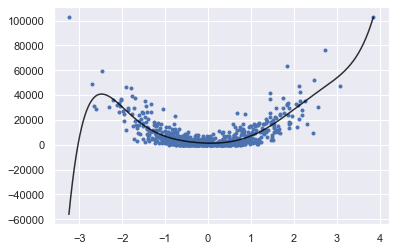

R^2 score:0.74
MSE:3543.90
RMSE:5576.57
R^2 score:-0.28
MSE:5241.18
RMSE:14756.85
Original features: 1
Current features in the transformed space: 9


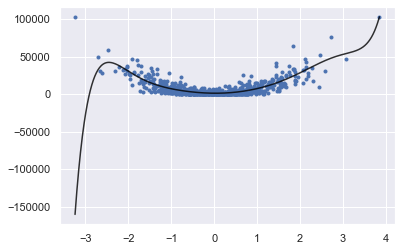

R^2 score:0.74
MSE:3538.83
RMSE:5570.61
R^2 score:-2.13
MSE:6027.31
RMSE:23095.38
Original features: 1
Current features in the transformed space: 10


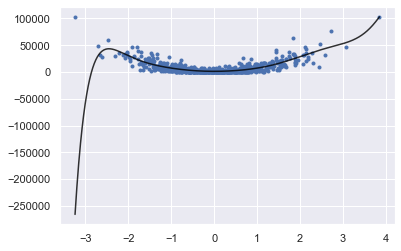

R^2 score:0.74
MSE:3541.57
RMSE:5568.99
R^2 score:-4.94
MSE:6785.41
RMSE:31784.30
Original features: 1
Current features in the transformed space: 11


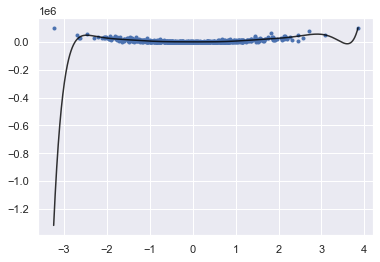

R^2 score:0.74
MSE:3545.72
RMSE:5521.97
R^2 score:-84.16
MSE:14397.52
RMSE:120396.32
Original features: 1
Current features in the transformed space: 12


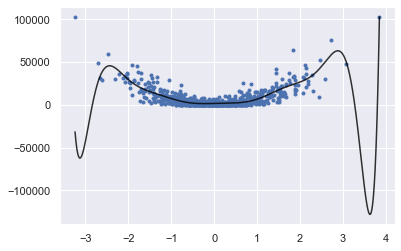

R^2 score:0.74
MSE:3561.33
RMSE:5502.39
R^2 score:0.00
MSE:5113.09
RMSE:13038.27
Original features: 1
Current features in the transformed space: 13


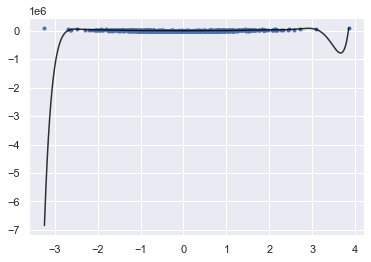

R^2 score:0.76
MSE:3472.17
RMSE:5364.12
R^2 score:-2023.54
MSE:54009.62
RMSE:587025.43
Original features: 1
Current features in the transformed space: 14


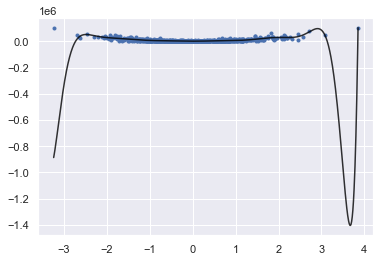

R^2 score:0.76
MSE:3460.94
RMSE:5338.48
R^2 score:-40.32
MSE:11377.96
RMSE:83861.97
Original features: 1
Current features in the transformed space: 15


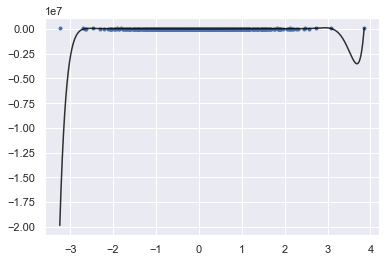

R^2 score:0.76
MSE:3436.80
RMSE:5278.00
R^2 score:-16710.65
MSE:147068.34
RMSE:1686565.69
Original features: 1
Current features in the transformed space: 16


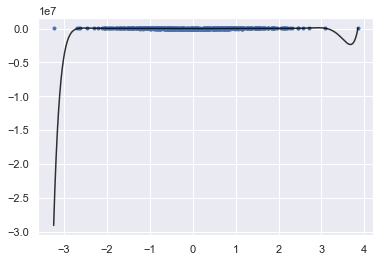

R^2 score:0.76
MSE:3441.33
RMSE:5274.78
R^2 score:-35686.68
MSE:212948.12
RMSE:2464635.92
Original features: 1
Current features in the transformed space: 17


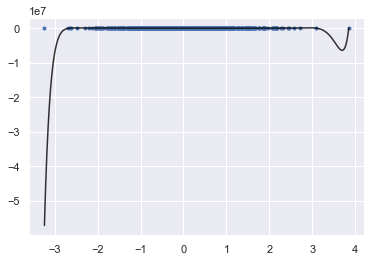

R^2 score:0.77
MSE:3435.93
RMSE:5268.40
R^2 score:-137445.65
MSE:413630.63
RMSE:4836828.68


In [133]:
for degree in range(1,18):
    results_df = pd.concat([results_df, create_model(X,y, dg=degree)])

In [134]:
results_df

,Features,MAE_train,MAE_test
features,1.0,7181.560933,8121.313244
features,2.0,3581.933778,4331.752527
features,3.0,3581.400263,4325.382292
features,4.0,3581.195690,4321.621979
features,5.0,3579.894828,4340.232799
features,6.0,3581.464832,4408.618829
features,7.0,3544.409828,5078.571268
features,8.0,3543.895806,5241.180968
features,9.0,3538.829341,6027.308969
features,10.0,3541.570521,6785.407158


Text(0.5, 1.0, 'Tradeoff Bias-Variance')

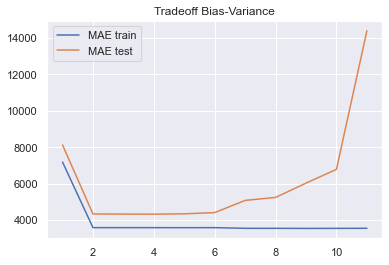

In [135]:
plt.plot(results_df[:11]['Features'], results_df[:11]['MAE_train'], label='MAE train')
plt.plot(results_df[:11]['Features'], results_df[:11]['MAE_test'], label='MAE test')
plt.legend()
plt.title('Tradeoff Bias-Variance')

## Resumindo

_____________

Agora que já entendemos a técnica em um dataset bem simples, vamos voltar pra um dataset real!

Vamos voltar pros dados da precificação de casa -- ali, o poly_features se mostrará ainda mais útil!

In [136]:
df = pd.read_csv('../datasets/house_prices.csv')
df = df.select_dtypes(include=np.number).dropna()

df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [137]:
X = df.drop(columns=['SalePrice','Id'])
y = df['SalePrice']

In [138]:
X.shape, y.shape

((1121, 36), (1121,))

In [139]:
# split train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# instanciando com os parâmetros
poly = PolynomialFeatures(degree=1, include_bias=False)
# fit apenas em dados de treino!
poly.fit(X_train)

print(f'Original features: {poly.n_features_in_}')
print(f'Current features in the transformed space: {poly.n_output_features_}')

# transformar com todos os dados
X_train = poly.transform(X_train)
X_test = poly.transform(X_test)

# create and fit model
reg_lin = LinearRegression()
reg_lin.fit(X_train, y_train)

print(f'Intercept (b0): {reg_lin.intercept_}')
print(f'Parameters (b1,...,bn): {reg_lin.coef_}')

# trainning prediction
y_pred_train = reg_lin.predict(X_train)
print('\nTrain Metrics')
print(f'R^2 score:{r2_score(y_train, y_pred_train):.2f}')
print(f'MAE:{mean_absolute_error(y_train, y_pred_train):.2f}')
print(f'RMSE:{np.sqrt(mean_squared_error(y_train, y_pred_train)):.2f}')

# test prediction
y_pred = reg_lin.predict(X_test)
print('\nTest Metrics')
print(f'R^2 score:{r2_score(y_test, y_pred):.2f}')
print(f'MAE:{mean_absolute_error(y_test, y_pred):.2f}')
print(f'RMSE:{np.sqrt(mean_squared_error(y_test, y_pred)):.2f}')

Original features: 36
Current features in the transformed space: 36
Intercept (b0): -457586.59844749176
Parameters (b1,...,bn): [-2.09840235e+02 -6.22245251e+01  4.29203229e-01  1.96542920e+04
  5.07228946e+03  2.86898275e+02  1.25155507e+02  2.64927205e+01
  4.75018636e+00  4.49071349e+00 -3.00319581e+00  6.23770403e+00
  1.03503162e+01  1.39030809e+01  5.09112525e+00  2.93445223e+01
  1.15651290e+04  1.33874840e+03  5.01014376e+03 -1.95544480e+03
 -9.48684978e+03 -2.14750237e+04  4.58715787e+03  4.79391824e+03
 -1.73822466e+01  1.83445528e+04  5.86043038e+00  2.02568027e+01
 -3.14383329e+00  1.18478232e+01  5.86571031e+01  6.69736175e+01
 -6.19269025e+01 -3.91009199e+00 -5.28006128e+00 -1.91225833e+02]

Train Metrics
R^2 score:0.81
MAE:22141.31
RMSE:35608.43

Test Metrics
R^2 score:0.80
MAE:23615.83
RMSE:39852.60


In [140]:
results_df = pd.DataFrame({
    'Features':[],
    'MAE_train':[],
    'MAE_test':[]
})

for degree in range(1,5):
    results_df = pd.concat([results_df, create_model(X,y, dg=degree, plot=False)])

Original features: 36
Current features in the transformed space: 36
R^2 score:0.81
MSE:22141.31
RMSE:35608.43
R^2 score:0.80
MSE:23615.83
RMSE:39852.60
Original features: 36
Current features in the transformed space: 702
R^2 score:0.98
MSE:8254.70
RMSE:12119.72
R^2 score:-17.06
MSE:70520.62
RMSE:377369.99
Original features: 36
Current features in the transformed space: 9138
R^2 score:1.00
MSE:0.00
RMSE:0.00
R^2 score:-11.86
MSE:158852.93
RMSE:318495.09
Original features: 36
Current features in the transformed space: 91389
R^2 score:1.00
MSE:0.01
RMSE:0.01
R^2 score:-3263.85
MSE:481881.52
RMSE:5074538.72


Text(0.5, 1.0, 'Tradeoff Bias-Variance')

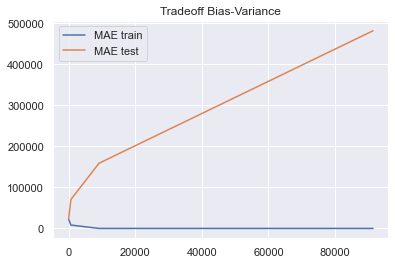

In [141]:
plt.plot(results_df['Features'], results_df['MAE_train'], label='MAE train')
plt.plot(results_df['Features'], results_df['MAE_test'], label='MAE test')
plt.legend()
plt.title('Tradeoff Bias-Variance')

O que podemos dizer sobre este modelo?

**It´s OVER 9000**

Com quantas features o modelo final foi construído?  

DEMAIS

Nossa hipótese é:

$$ f_{H, \vec{b}}(\vec{x}) = b_0 + b_1x_1 + b_2x_2 + \cdots + b_{702} x_{702}$$

Ou seja, temos um modelo **com muitos parâmetros**, ou seja, **muito complexo!**

Com tantos parâmetros assim, há muitos **graus de liberdade** pra que a hipótese se ajuste até às particularidades da base de treino... 

O resultado é evidente: temos um modelo altamente **overfitado**, dado o número enorme de features após o transformer -- e isso porque estamos utilizando apenas features quadráticas, imagine se tivéssemos usado features de grau maior!

É de se imaginar que muitas destas features não deveriam estar aí, não é mesmo?

Oras, uma forma interessante de eliminar features é fazendo o que chamamos de **feature selection**.

A ideia é a seguinte: gostaríamos sim de introduzir features quadráticas, aumentando um pouco a complexidade da hipótese, **mas não tanto!**. 

E é isso que conseguiremos fazer com as técnicas de **regularização**.

_____

## 2) Regularização

Neste ponto, é muito importante que falemos sobre **regularização**.

O objetivo da regularização é **diminuir a complexidade** de modelos, de modo a evitar que particularidades da base de treino (ruídos) sejam aprendidos (ou seja, evitar overfitting!)

Uma outra forma de enxergar regularização: **diminuição do espaço de hipóteses!**

<img src=https://curso-r.github.io/main-intro-ml/slides/static/img/erro_treino_erro_teste.png width=500>

### Regressão linear (sem regularização)

<img src=https://s3-sa-east-1.amazonaws.com/lcpi/5408b0a7-85f3-4824-ad68-44867121ecb9.png width=600>

### L1 (Lasso)

<img src=https://s3-sa-east-1.amazonaws.com/lcpi/acabe9da-07ba-4337-b467-dd2701a40cc8.png width=700>

### L2 (Ridge)

<img src=https://s3-sa-east-1.amazonaws.com/lcpi/46eda310-fb2f-498b-b455-593183de1dd7.png width=700>

Para saber como relacionar $t$ com $\lambda$, veja [este post](https://stats.stackexchange.com/questions/259177/expressing-the-lasso-regression-constraint-via-the-penalty-parameter) ou então [este](https://stats.stackexchange.com/questions/90648/kkt-versus-unconstrained-formulation-of-lasso-regression) -- discussões bem matemáticas!

Observações importantes:

- $\lambda$ é um parâmetro que controla a "força" da regularização<br><br>
- **L1 pode zerar coeficientes** - faz feature selection<br><br>
- **L2 apenas diminui o tamanho de coeficientes** - não faz feature selection<br><br>

<img src=https://ugc.futurelearn.com/uploads/assets/2b/fe/2bfe399e-503e-4eae-9138-a3d7da738713.png width=800>



Geometricamente:

<img src=https://www.astroml.org/_images/fig_lasso_ridge_1.png width=800>

No sklearn, é possível fazer um modelo de regressão linear regularizado facilmente com as classes respectivas:

- [Regularização L2/Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge)

- [Regularização L1/Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso)

Há, no sklearn, também uma implementação para um tipo de regularização conhecida como **Elastic Net**:

<img src=https://miro.medium.com/max/761/1*nrWncnoJ4V_BkzEf1pd4MA.png width=600>

A classe se chama [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html#sklearn.linear_model.ElasticNet)



Vamos utilizar regularização no dataset das casas, juntamente com as features polinomiais:

> **IMPORTANTE**: como os métodos de regularização são baseados na norma do vetor de parâmetros, é muito importante que as features sejam escaladas para que os métodos funcionem bem!

Isso porque a escala das features irá influenciar a regularização aplicada ao parâmetro respectivo!

Para eliminar este efeito, escalar os dados é muito importante!

In [228]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso, Ridge

In [269]:
# create data
X = np.arange(10)
y = X**2

np.random.seed(42)
noise = np.random.normal(0,3,10)
y = y + noise

#X = X.reshape(-1,1)
#y = y.reshape(-1,1)

# função teórica
x_plot = np.linspace(0,10,1000)
y_plot = x_plot**2
# plot
#plt.scatter(X, y)
#plt.plot(x_plot, y_plot, color='red')

In [293]:
def calc_y_plot(estimator, x_plot):
    
    return sum([y_plot + b_n*(x_plot**(n+1)) for n, b_n in enumerate(estimator.coef_)]) + estimator.intercept_

def create_model(X, y, dg=2):

    poly = PolynomialFeatures(degree=dg, include_bias=False)
    poly.fit(X.reshape(-1,1))
    X_transf = poly.transform(X.reshape(-1,1))

    # ----------

    mms = MinMaxScaler().fit(X_transf)
    X_transf = mms.transform(X_transf)

    # ----------
    reg_lin = LinearRegression().fit(X_transf, y)
    reg_l1 = Lasso(alpha=1).fit(X_transf, y)
    reg_l2 = Ridge(alpha=1).fit(X_transf, y)


    print(f'\nModel {dg}\n')
    # plot data
    plt.scatter(X_transf[:,0], y)

    x_plot = np.linspace(X_transf[:,0].min(), X_transf[:,0].max(), 1000)
    # reg_lin
    y_plot = calc_y_plot(reg_lin, x_plot)
    plt.plot(x_plot, y_plot, color='yellow')
    # lasso
    y_plot_l1 = calc_y_plot(reg_l1, x_plot)
    plt.plot(x_plot, y_plot_l1, color='green')
    # ridge
    y_plot_l2 = calc_y_plot(reg_l2, x_plot)
    plt.plot(x_plot, y_plot_l2, color='cyan')

    plt.show()

In [ ]:
for degree in range(1,8):
    create_model(X,y,degree)

Melhoramos muito!!

Vamos ver agora o Lasso

Legal! Estamos na direção de melhorias!

Por fim, vamos ver o elastic net!

Muito legal, não é mesmo?

Mas, é visível que ainda há espaços pra melhorias!

_____

Uma pergunta importante é: **como selecionar um valor adequado para os parâmetros de regularização?**

Naturalmente, este é um hiperarâmetro bastante importante, dado que ele controla a "força" da regularização a ser aplicada.

E, no caso do elastic net, o parâmetro de mistura também é muito relevante!

Uma abordagem para a escolha de valores adequados de hiperparâmetros (processo chamado de **hyperparameter tuning**) é testar exaustivamente vários valores com o processo de **validação cruzada**, de modo a encontrarmos os melhores valores (e/ou combinação de valores) de hiperparâmetros.

Antes de nos aprofundarmos no processo de tuning, vamos entender melhor o que é a validação cruzada!

Para isso, veja o notebook da próxima aula! ;)

# Exercicio

In [298]:
from sklearn.linear_model import ElasticNet
# terminal colors
WHITE = '\033[39m'
CYAN = '\033[36m'
GREEN = '\033[32m'
RED = '\033[31m'

### functions

In [303]:
def display_na(df):
    plt.figure(figsize=(10,8))
    sns.displot(
        data=df.loc[:, df.isna().any()].isna().melt(value_name="missing"),
        y="variable",
        hue="missing",
        multiple="fill",
        aspect=3,
        palette='crest'
    )
    plt.title('Bar plot showing Non-Missing Values', weight='bold', fontsize = 18, pad=20, loc='left')
    plt.xlabel(" ")
    plt.ylabel(" ")
    plt.xticks(size=12, weight = 'bold')
    plt.yticks(size=12, weight = 'bold');

    plt.figure(figsize=(18,8))
    sns.heatmap(df.loc[:, df.isna().any()].isna().transpose(),
                cmap="GnBu",
                cbar_kws={'label': 'Missing Data'})
    plt.title('Heatmap showing Missing Values', weight='bold', fontsize=18, pad=20, loc='left')
    plt.xticks(size=12)
    plt.yticks(size=12)
    plt.show();

In [300]:
def make_prediction(model, X, y, data_type = 'Test', summary = True):

    y_pred = model.predict(X)
    if summary:
        print(f'{CYAN}{data_type} prediction:{WHITE}')
        print(f'R^2 score:{r2_score(y, y_pred):.2f}')
        print(f'MAE:{mean_absolute_error(y, y_pred):.2f}')
        print(f'RMSE:{np.sqrt(mean_squared_error(y, y_pred)):.2f}')

    return y_pred

In [345]:
def create_poly_regression(X, y, degree, model_type='lr', alpha=1, max_iter=1000, l1_ratio=0.5, summary=False):

    '''
    - model_type (str): ["l1","l2","en",None]
    ''' 

    # --------------------------------------------------------
    # split train-test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


    # --------------------------------------------------------
    # preprocessing with polynominal features
    poly = PolynomialFeatures(degree=degree, include_bias=False).fit(X_train)

    if summary:
        print(f'{CYAN}Original features:{WHITE} {poly.n_features_in_}')
        print(f'{CYAN}Current features in the transformed space:{WHITE} {poly.n_output_features_}\n')

    # transform train and test data
    X_train = poly.transform(X_train)
    X_test = poly.transform(X_test)

    # --------------------------------------------------------
    # normalize data
    mms = MinMaxScaler().fit(X_train)

    # transform train and test data
    X_train = mms.transform(X_train)
    X_test = mms.transform(X_test)    

    # --------------------------------------------------------
    # create and fit model
    if model_type == 'l1':
        model = Lasso(alpha=alpha, max_iter=max_iter).fit(X_train, y_train)
         
    elif model_type == 'l2':
        model = Ridge(alpha=alpha, max_iter=max_iter).fit(X_train, y_train)

    elif model_type == 'en':
        model = ElasticNet(alpha=alpha, max_iter=max_iter, l1_ratio=0.5, random_state=42).fit(X_train, y_train)

    elif model_type == 'lr':
        model = LinearRegression().fit(X_train, y_train)

    # --------------------------------------------------------
    # trainning prediction
    y_pred_train = make_prediction(model, X_train, y_train, data_type='Train', summary=summary)

    # test prediction
    y_pred = make_prediction(model, X_test, y_test, summary=summary)

    # creating results data frame
    return pd.DataFrame({
                        'Features' : poly.n_output_features_,
                        'MAE_train' : mean_absolute_error(y_train, y_pred_train),
                        'MAE_test' : mean_absolute_error(y_test, y_pred)
                    }, index=[model_type])

### read data

In [316]:
df = pd.read_csv('../datasets/house_prices.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


### check na

<Figure size 720x576 with 0 Axes>

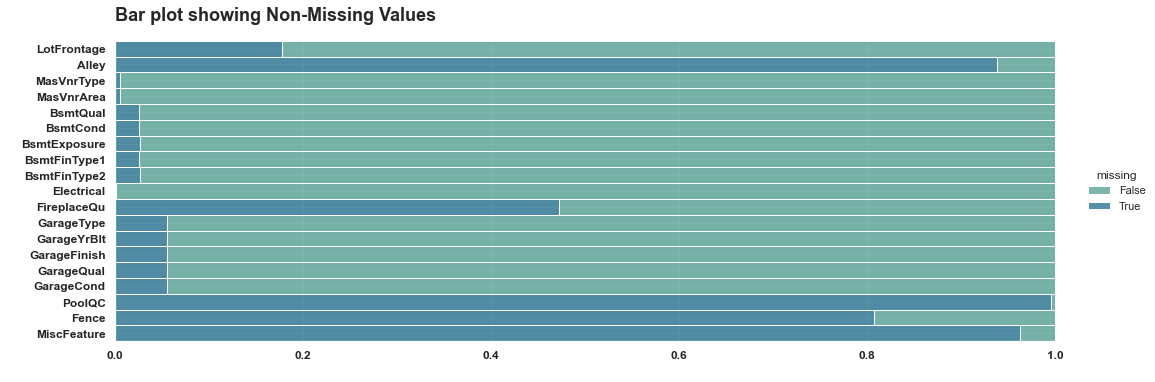

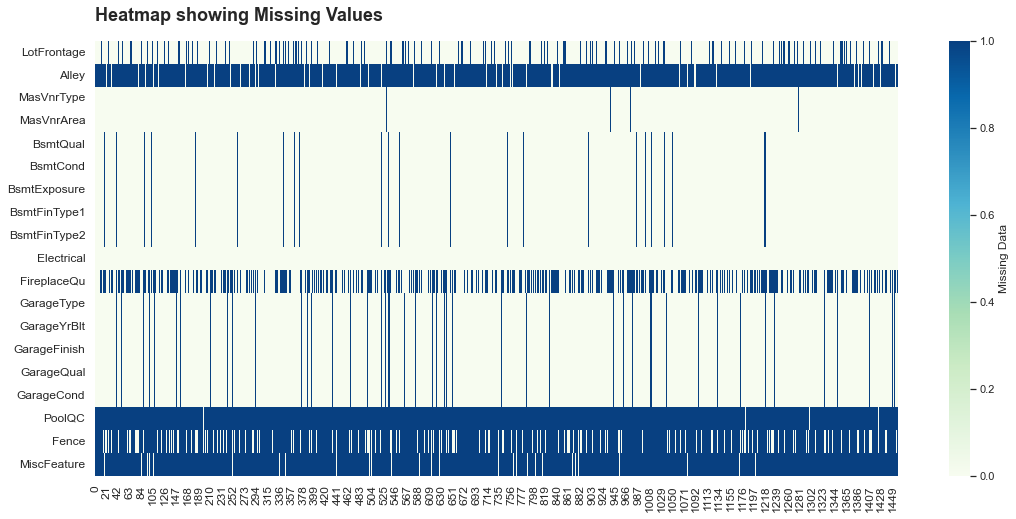

In [304]:
display_na(df)

In [313]:
df_nunique = df.nunique() / df.shape[0]
df_nunique[df_nunique > 0.5]

Id           1.000000
LotArea      0.734932
BsmtUnfSF    0.534247
1stFlrSF     0.515753
GrLivArea    0.589726
dtype: float64

### create model

In [320]:
model_df = df.select_dtypes(include=np.number).dropna().drop(columns=['Id'])
print(f'Data loss = {100 - (model_df.shape[0] / df.shape[0]* 100):.2f} %')

model_df

Data loss = 23.22 %


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,366,0,112,0,0,0,0,4,2010,142125


In [322]:
# define features and targets
X = model_df.drop(columns= 'SalePrice')
y = model_df['SalePrice']

### <span style='color:Gold'>linear regression

In [346]:
create_poly_regression(X, y, degree=2, summary=True)

Original features: 36
Current features in the transformed space: 702

Train prediction:
R^2 score:0.98
MAE:8255.35
RMSE:12119.66
Test prediction:
R^2 score:-124271236980061503488.00
MAE:68346733969038.06
RMSE:990033905560164.25


,Features,MAE_train,MAE_test
lr,702,8255.351333,6.834673e+13


### <span style='color:Gold'>lasso

In [347]:
create_poly_regression(X, y, degree=2, model_type='l1', alpha=1, summary=True)

Original features: 36
Current features in the transformed space: 702

Train prediction:
R^2 score:0.97
MAE:10577.16
RMSE:15040.49
Test prediction:
R^2 score:0.79
MAE:25520.11
RMSE:40948.93


/Users/baiochi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.147e+10, tolerance: 5.920e+08
  model = cd_fast.enet_coordinate_descent(


,Features,MAE_train,MAE_test
l1,702,10577.158477,25520.105423


In [348]:
create_poly_regression(X, y, degree=2, model_type='l1', alpha=100, max_iter=2000, summary=True)
# obs: max_iter avoid ConvergenceWarning

Original features: 36
Current features in the transformed space: 702

Train prediction:
R^2 score:0.90
MAE:17426.78
RMSE:26233.22
Test prediction:
R^2 score:0.85
MAE:19968.68
RMSE:34158.48


,Features,MAE_train,MAE_test
l1,702,17426.779325,19968.683413


In [350]:
create_poly_regression(X, y, degree=3, model_type='l1', alpha=100, max_iter=2000, summary=True)

Original features: 36
Current features in the transformed space: 9138

Train prediction:
R^2 score:0.92
MAE:15386.67
RMSE:22289.43
Test prediction:
R^2 score:0.88
MAE:18343.66
RMSE:30568.96


,Features,MAE_train,MAE_test
l1,9138,15386.665454,18343.663189


### <span style='color:Gold'>ridge

In [351]:
create_poly_regression(X, y, degree=2, model_type='l2', alpha=1, summary=True)

Original features: 36
Current features in the transformed space: 702

Train prediction:
R^2 score:0.93
MAE:14172.77
RMSE:20771.18
Test prediction:
R^2 score:0.85
MAE:20635.95
RMSE:34492.71


,Features,MAE_train,MAE_test
l2,702,14172.769285,20635.954396
